# Micro-Challenges for ARIMA Forecasting Notebook

Imagine you are a newly hired data scientist at Data and Divination and your new client is a crypto trading company who likes you to predict the future crypto prices. Here is a dataset assigned to you.

**Micro-challenge 1: Data Pre-processing**

Preprocess the data to make it ready for the time-series analysis.

**Micro-challenge 2:Model Building**

Visualize the data using ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to identify potential ARIMA(p,d,q) parameters.
Experiment with different combinations of ARIMA parameters and compare their AIC scores, and pick the right parameters and build the best Arima Model.

**Micro-challenge 3: Forecasting**

Forecast the next 10 days of cryptocurrency prices using the best ARIMA model. Analyze the forecast's confidence intervals.

This solution notebook has walked through the process of loading cryptocurrency data, performing exploratory data analysis, and building an ARIMA model for price forecasting.


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# Load the dataset
df = pd.read_csv('crypto-markets-bitcoin.csv', nrows=100)

# Display the first few rows of the dataframe
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'crypto-markets-bitcoin.csv'

# Challenge: 1 Data Preprocessing

We need to ensure that the data is in a suitable format
for time series forecasting. This typically involves:

* Checking for missing values and handling them if necessary.
* Converting the date column to a datetime data type and setting it as the index of the DataFrame.
* Selecting a single cryptocurrency to forecast.
* Choosing the price type (open, high, low, close) to use for forecasting.









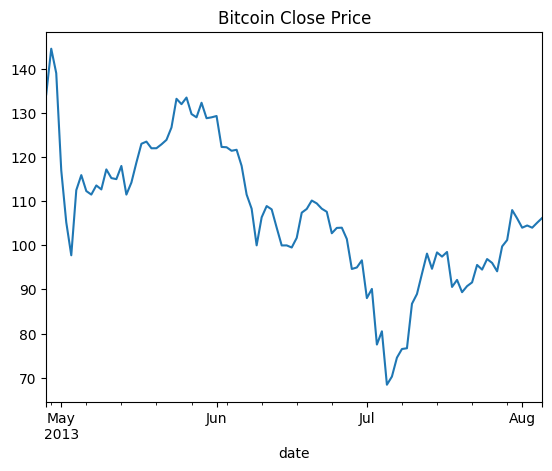

Missing values in BTC close price: 0


In [ ]:


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Sort the DataFrame by the index
df.sort_index(inplace=True)

# Selecting Bitcoin for forecasting
btc_df = df[df['symbol'] == 'BTC']

# Using 'close' price for forecasting
btc_close = btc_df['close']

# Check for missing values
missing_values = btc_close.isnull().sum()

# Display the preprocessed close prices and missing values
btc_close.plot(title='Bitcoin Close Price')
plt.show()
print(f'Missing values in BTC close price: {missing_values}')

Challenge-2. Build an ARIMA model. Now that the data is ready, we can proceed to build an ARIMA model. The ARIMA model requires three parameters (p, d, q):

p: The number of lag observations included in the model (lag order).

d: The number of times that the raw observations are differenced (degree of differencing).

q: The size of the moving average window (order of moving average).

We will start by determining the order of differencing (d) by plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the appropriate parameters.

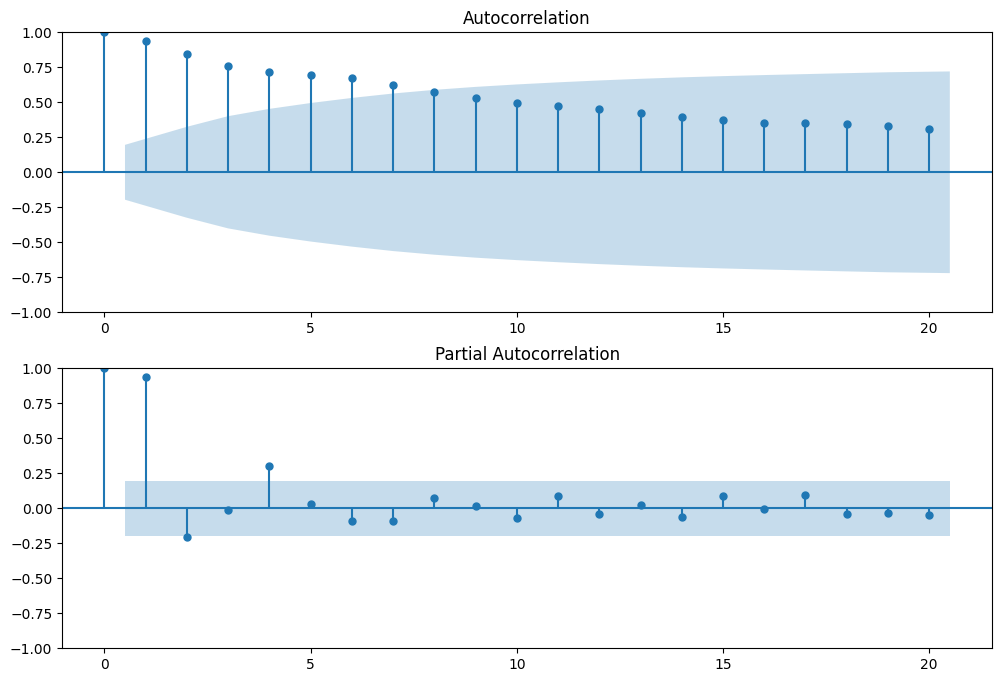

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF on ax1
plot_acf(btc_close, lags=20, ax=ax1)

# Plot the PACF on ax2
plot_pacf(btc_close, lags=20, ax=ax2)

# Show plot
plt.show()

These plots can help us determine the ARIMA model parameters. Here's how we can interpret them:

The ACF plot shows the correlation of the series with its lags. In a stationary series, the ACF will drop to zero relatively quickly, while the PACF will drop to zero after the lag equal to the order of the AR term.

The PACF plot shows the partial correlation of a series with its own lagged values, controlling for the values of the time series at all shorter lags.

Based on the ACF and PACF plots, we can make initial guesses for the ARIMA parameters.

However, it's often best to use a systematic approach such as the Akaike Information Criterion (AIC) to find the most suitable parameters.

In [ ]:
import itertools

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
# We are not using seasonal effects in this model
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in list(itertools.product(p, d, q))]

# Search for the optimal set of parameters that yields the best performance for the model
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(btc_close, order=param)
            results = mod.fit()

            # Compare this model's AIC to the best (lowest) AIC we've seen so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except:
            continue

print('Best ARIMA{} AIC={}'.format(best_pdq, best_aic))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best ARIMA(2, 1, 2) AIC=600.3303685912418


The ARIMA(2, 1, 2) model has been fitted to the Bitcoin close price data, and a forecast has been performed. Below is the model summary and the forecast plot.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -295.165
Date:                Mon, 06 Nov 2023   AIC                            600.330
Time:                        18:44:14   BIC                            613.306
Sample:                    04-28-2013   HQIC                           605.580
                         - 08-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3156      0.206     -1.533      0.125      -0.719       0.088
ar.L2         -0.5873      0.194     -3.022      0.003      -0.968      -0.206
ma.L1          0.4694      0.189      2.485      0.0

<ipython-input-13-52ab049062ea>:11: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=btc_close.index[-1], periods=6, closed='right')


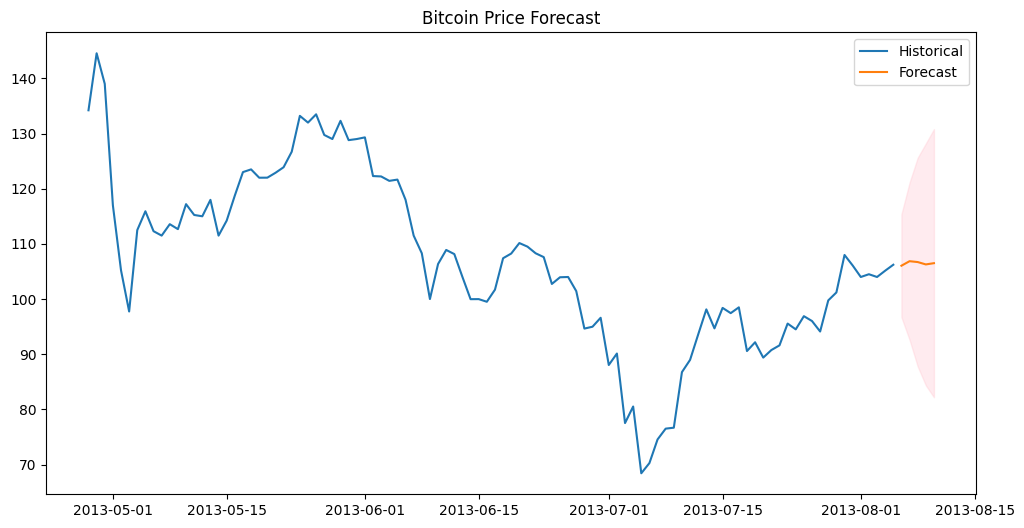

In [ ]:
# Fit the ARIMA model with the identified best parameters
best_model = ARIMA(btc_close, order=(2, 1, 2))
fitted_model = best_model.fit()

# Summary of the model
model_summary = fitted_model.summary()
print(model_summary)

# Perform a forecast
forecast = fitted_model.get_forecast(steps=5)
forecast_index = pd.date_range(start=btc_close.index[-1], periods=6, closed='right')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the forecast alongside the historical data
plt.figure(figsize=(12,6))
plt.plot(btc_close, label='Historical')
plt.plot(forecast_series, label='Forecast')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.legend()
plt.show()

The plot should show the historical close prices of Bitcoin along with the forecasted values and a confidence interval. This visual representation will give you an idea of how the model expects the price to move in the short term.